In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fuel = pd.read_csv("Fuel.csv")
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Cleaning and Basic EDA

In [14]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [5]:
fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#selecting important columns
fuel = fuel[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
fuel.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

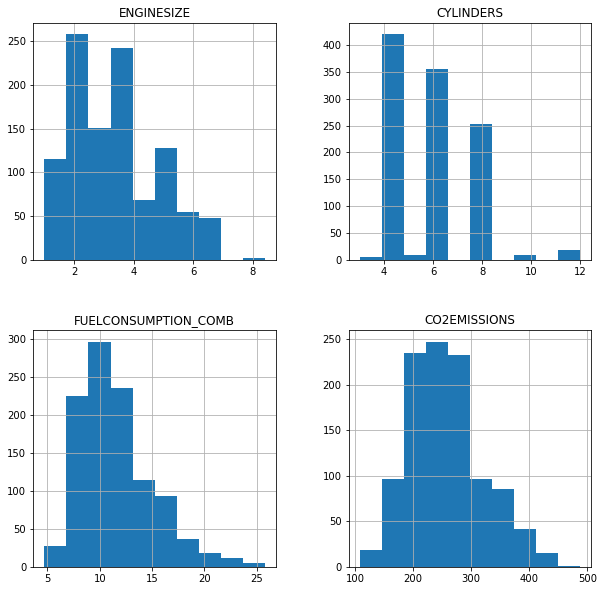

In [7]:
fuel.hist(figsize=(10,10))

### Feature vs Feature

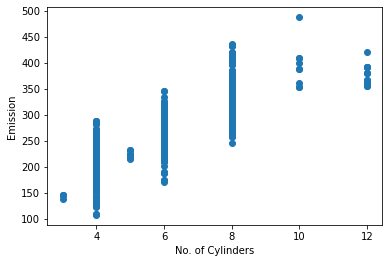

In [10]:
#cylinders vs CO2emission

plt.scatter(fuel["CYLINDERS"] , fuel["CO2EMISSIONS"])
plt.xlabel("No. of Cylinders")
plt.ylabel("Emission")
plt.show()

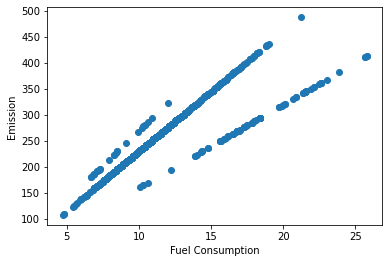

In [11]:
#fuel consumption vs CO2emissions/

plt.scatter(fuel["FUELCONSUMPTION_COMB"] , fuel["CO2EMISSIONS"])
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

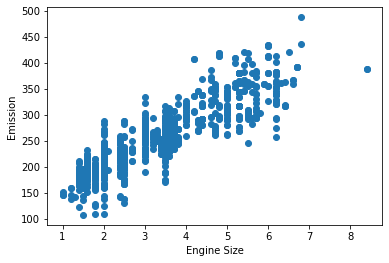

In [13]:
#engine size vs CO2emissions

plt.scatter(fuel["ENGINESIZE"] , fuel["CO2EMISSIONS"])
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

### Training and Testing Data Selection

In [16]:
clist = np.random.rand(len(fuel))<0.8
clist

array([ True,  True, False, ...,  True,  True,  True])

In [20]:
# Taking 80% of the data for training and 20% for testing.

train = fuel[:(int((len(fuel)*0.8)))]
test = fuel[(int((len(fuel)*0.8))):]

print ("Training Data: ",train.shape)
print ("Testing Data: ",test.shape)
print ("Total Data Entries: ",fuel.shape)

Training Data:  (853, 4)
Testing Data:  (214, 4)
Total Data Entries:  (1067, 4)


In [22]:
# Finding the average co2 emission :

emission = fuel["CO2EMISSIONS"]
avg_emi = emission.mean()
avg_emi

256.2286785379569

## Functions

In [23]:
#Main function to find Slope and Intercept

def simple_linear_regression(input_feature,output):
    Xi = input_feature
    Yi = output
    N = len(Xi)
    
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
    
    S_YiXi = (Yi*Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    S_XiXi = (Xi*Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept,slope)

In [25]:
# Testing our function :

test_feature = np.array(range(5))
test_output = np.array(1+1*test_feature)

(test_intercept,test_slope) = simple_linear_regression(test_feature,test_output)

print ("Intercept :",test_intercept)
print ("Slope :" , test_slope)

Intercept : 1.0
Slope : 1.0


In [26]:
#Finding slope and Interccept for actual data

co2_intercept , co2_slope = simple_linear_regression(train["ENGINESIZE"],train["CO2EMISSIONS"])

print ("Intercept",co2_intercept)
print ("Slope",co2_slope)

Intercept 127.16989950881947
Slope 38.79512383605651


In [27]:
#Equation of best fit regression line

print ("Y =",co2_intercept,"*X   +   ",co2_slope)

Y = 127.16989950881947 *X   +    38.79512383605651


Text(0, 0.5, 'Emission')

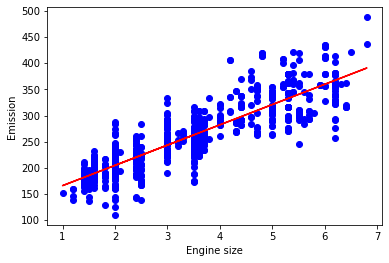

In [28]:
#Plotting regression line with data points :

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(train["ENGINESIZE"], co2_slope*train["ENGINESIZE"] + co2_intercept, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
#Prediction function

def predict(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [30]:
#Predicting emission :

my_engine_size = 3.5

estimatd_emission = predict(my_engine_size,co2_intercept,co2_slope)
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350172


### Calculating Errors

In [32]:
def rss(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RSS = (residual*residual).sum()
    
    return (RSS)

In [33]:
#Error for our test data

print (rss(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

159741.10295932184


In [35]:
#Error for our train data

print (rss(train["ENGINESIZE"],train["CO2EMISSIONS"],co2_intercept,co2_slope))

850827.1822780487


In [36]:
def rsquare(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    res = (residual*residual).sum()
    
    rest = output - output.mean()
    
    total = (rest*rest).sum()
    
    return (1 - res/total)

In [38]:
#Caluclating the R square for our test data

print (rsquare(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

0.7861345372905516


In [42]:
#Mean Absolute Error

def mae(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    
    var = (Yi - prediction).abs().sum()
    
    MAE = var/len(Yi)
    
    return MAE

In [43]:
#Calculating MAE for our test data

print(mae(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

20.60219790300967


In [44]:
#Mean Squared Error

def mse(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)*(Yi - prediction)).sum()
    
    MSE = var/len(Yi)
    
    return MSE

In [45]:
#Calculating MSE for our test data

print (mse(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

746.4537521463637


In [46]:
#Mean Absolute Percentage Error

def mape(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)/Yi).abs().sum()
    
    MAPE = var/len(Yi) *100
    
    return MAPE

In [47]:
#Calculating MAPE for our test data

print (mape(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

9.517892792436761


In [48]:
#Mean Percentage Error

def mpe(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)/Yi).sum()
    
    MPE = var/len(Yi) *100
    
    return MPE

In [49]:
#Calculating MPE for our test data

print (mpe(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

-3.5512019352507753


##### Insight: This means most of our data is under the regression line

In [51]:
#Predicting Engine size from CO2 Emissions

def espredict(output, intercept, slope):
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [52]:
#Predicting Engine size from CO2 Emissions

co2_emission = 250

estimatd_engine_size = espredict(co2_emission,co2_intercept,co2_slope)
print ("Estimated Engine Size :",estimatd_engine_size)

Estimated Engine Size : 3.166122139737088


## The End.